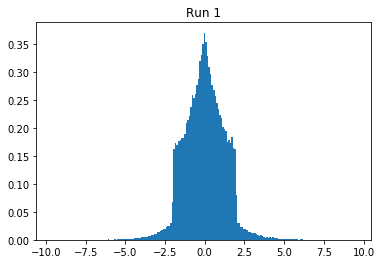

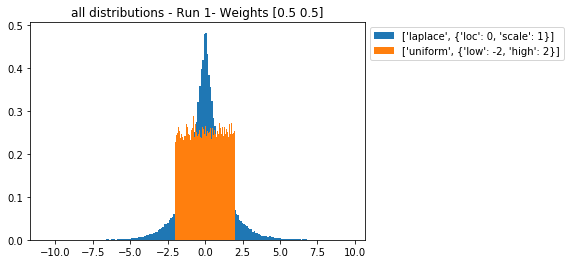

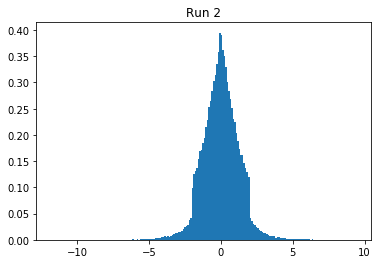

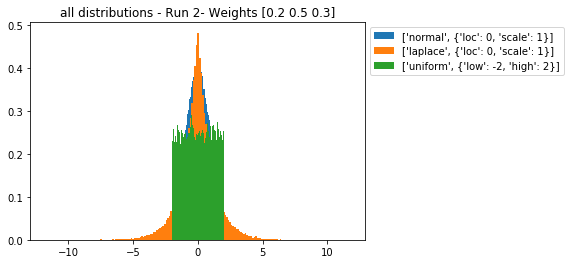

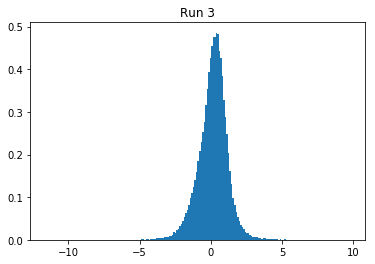

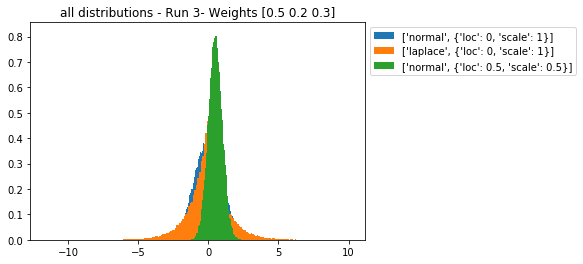

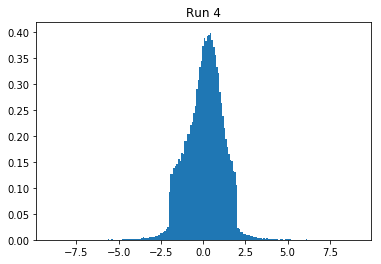

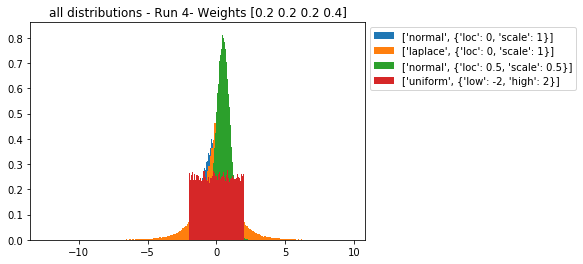

In [3]:
import numpy as np
import matplotlib.pyplot as plt




#creating the run object

class Run():
    
    def __init__(self, distributions, coefficients, sample_size, name):
        
        self.distributions = distributions
        self.coefficients = coefficients
        self.sample_size = sample_size
        self.name = name
        

#selecting the different distributions with their weights and sample size    
run1 = Run(distributions = [
    {"type": np.random.laplace, "kwargs": {"loc": 0, "scale": 1}},
    {"type": np.random.uniform, "kwargs": {"low": -2, "high":2}},],
    coefficients = np.array([0.5, 0.5]),
    sample_size = 100000,
    name = 'Run 1')



run2 = Run(distributions = [
    {"type": np.random.normal, "kwargs": {"loc": 0, "scale": 1}},
    {"type": np.random.laplace, "kwargs": {"loc": 0, "scale": 1}},
    {"type": np.random.uniform, "kwargs": {"low": -2, "high":2}},],
    coefficients = np.array([0.2, 0.5, 0.3]),
    sample_size = 100000,
    name = 'Run 2')


run3 = Run(distributions = [
    {"type": np.random.normal, "kwargs": {"loc": 0, "scale": 1}},
    {"type": np.random.laplace, "kwargs": {"loc": 0, "scale": 1}},
    {"type": np.random.normal, "kwargs": {"loc": 0.5, "scale": 0.5}},],
    coefficients = np.array([0.5, 0.2, 0.3]),
    sample_size = 100000,
    name = 'Run 3')


run4 = Run(distributions = [
    {"type": np.random.normal, "kwargs": {"loc": 0, "scale": 1}},
    {"type": np.random.laplace, "kwargs": {"loc": 0, "scale": 1}},
    {"type": np.random.normal, "kwargs": {"loc": 0.5, "scale": 0.5}},
    {"type": np.random.uniform, "kwargs": {"low": -2, "high":2}},],
    coefficients = np.array([0.2, 0.2, 0.2, 0.4]),
    sample_size = 100000,
    name = 'Run 4')


lst_run = [run1, run2, run3, run4]




#generating and plotting the mixtures




'''Sampling from a mixture of distributions (where PDFs are added with some coefficients
 c_1, c_2, ... c_n) is equivalent to sampling each independently, and then, for each index, 
picking the value from k-th sample, with probability c_k
'''

for run in lst_run:
    

    #number of distributions of each run
    num_distr = len(run.distributions)
    
    #creating a list where we are going to put our data
    data = np.zeros((run.sample_size, num_distr))
    
    #for each distribution I get the data sample, where (a,b) means a from distribution1, b from dist 2 and so on
    for idx, distr in enumerate(run.distributions):
        
        data[:, idx] = distr["type"](size=(run.sample_size,), **distr["kwargs"])
       
    
    #now I randomly select one value from each sample (can be distribution1, 2, ...) based on the weights  
    random_idx = np.random.choice(np.arange(num_distr), size=(run.sample_size,), p=run.coefficients)
    sample = data[np.arange(run.sample_size), random_idx]
    
    #plotting the hist
    plt.hist(sample, bins=200, density=True)
    plt.title(run.name)
    plt.show()
    
    label_distr = []
    
    for i in range((num_distr)):
        label_distr.append([run.distributions[i]['type'].__name__,run.distributions[i]['kwargs']])
        plt.hist(data[np.arange(run.sample_size), i], bins=200, density=True)
    
    plt.title('all distributions - ' + run.name + '- Weights '+ str(run.coefficients))
    
    plt.legend(label_distr, bbox_to_anchor=(1,1), loc="upper left")
    
    
    plt.show()

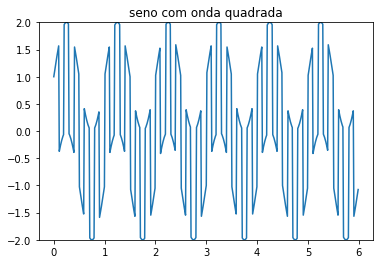

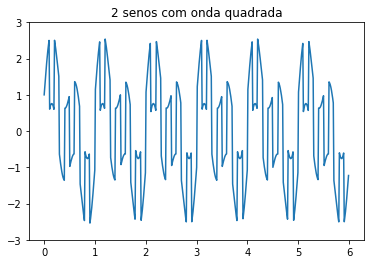

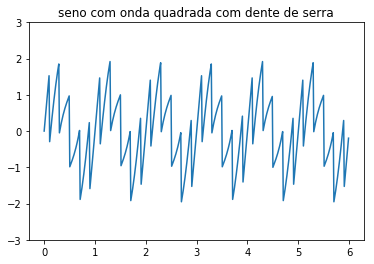

In [4]:
#mixture of signals

%matplotlib inline
from matplotlib.pyplot import figure
from numpy import arange, sin, pi

#sin with square wave
from scipy import signal
t = np.linspace(0, 6, 500, endpoint=False)

square = signal.square(2 * np.pi * 5 * t)

sin1 = sin(2*pi*t)

sum1 = sin1 + square

plt.plot(t, sum1)

plt.ylim(-2, 2)

plt.title('seno com onda quadrada')

plt.show()

#2 sins with square wave
t = np.linspace(0, 6, 500, endpoint=False)

square = signal.square(2 * np.pi * 5 * t)

sin1 = sin(2*pi*t)

sin2 = sin(4*pi*t)

sum2 = sin1 + sin2 +square

plt.plot(t, sum2)

plt.ylim(-3, 3)

plt.title('2 senos com onda quadrada')

plt.show()

#sin + square wave + sawtooth
t = np.linspace(0, 6, 500, endpoint=False)

square = signal.square(2 * np.pi * 5 * t)

sin1 = sin(2*pi*t)

saw = signal.sawtooth(2 * np.pi * 5 * t)

sum3 = square + sin1 + saw

plt.plot(t, sum3)

plt.ylim(-3, 3)

plt.title('seno com onda quadrada com dente de serra')

plt.show()

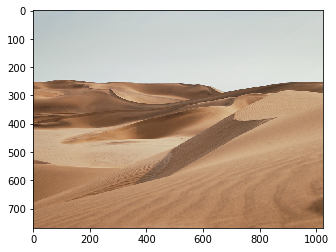

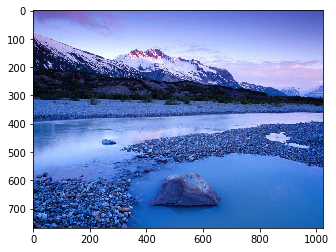

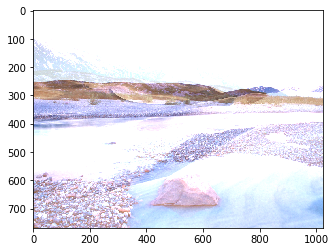

In [14]:
#mixting image
import cv2 
  
# Read Image1 
fig1 = cv2.imread('C:/Users/Notebook/Desktop/mestrado_ufrj/2020_1/ica/imagens/deserto1.jpg') 
fig1_aux = cv2.cvtColor(fig1, cv2.COLOR_BGR2RGB)
plt.imshow(fig1_aux)
plt.show() 

# Read image2 
fig2 = cv2.imread('C:/Users/Notebook/Desktop/mestrado_ufrj/2020_1/ica/imagens/montanha1.jpg') 
fig2_aux = cv2.cvtColor(fig2, cv2.COLOR_BGR2RGB)
plt.imshow(fig2_aux)
plt.show() 

# Add the images 
fig3 = cv2.add(fig1, fig2) 
fig3_aux = cv2.cvtColor(fig3, cv2.COLOR_BGR2RGB)
plt.imshow(fig3_aux)
plt.show()